In [181]:
import pandas as pd
import numpy as np

In [182]:
train = pd.read_csv("train_mushrooms.csv")
train

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,...,b,NaN,w,u,w,t,g,NaN,d,u
3116941,3116941,e,10.88,s,NaN,w,t,d,c,p,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,3116942,p,7.82,x,e,e,f,a,NaN,w,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,3116943,e,9.45,p,i,n,t,e,NaN,p,...,NaN,y,w,NaN,NaN,t,p,NaN,d,u


In [183]:
train.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [184]:
train.isna().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [185]:
x = train.drop("class", axis = 1)
y = train["class"]

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

In [188]:
x_train.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 2493556 entries, 2587250 to 305711
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), int64(1), object(17)
memory usage: 1.9 GB


In [189]:
x_train = x_train.drop("id", axis = 1)

In [190]:
x_train["cap-diameter"].describe()

count    2.493552e+06
mean     6.312014e+00
std      4.659248e+00
min      3.000000e-01
25%      3.320000e+00
50%      5.750000e+00
75%      8.240000e+00
max      8.067000e+01
Name: cap-diameter, dtype: float64

In [191]:
cd_med = x_train["cap-diameter"].median()
x_train["cap-diameter"] = x_train["cap-diameter"].fillna(cd_med).astype("float16")

In [192]:
cap_shape_vals = x_train["cap-shape"].value_counts()[:7].keys()
for i in cap_shape_vals:
    x_train[f"cap-shape_{i}"] =  (x_train["cap-shape"] == i).astype("int8")


In [193]:
x_train = x_train.drop("cap-shape", axis = 1)

In [194]:
x_train["cap-surface"].value_counts()[:15]

cap-surface
t    368469
s    308308
y    262158
h    227883
g    210937
d    165315
k    103142
e     95661
i     90811
w     87958
l     35895
n        74
f        59
p        44
u        42
Name: count, dtype: int64

In [195]:
cup_surf_d = x_train["cap-surface"].value_counts()[:11]
summa = cup_surf_d.sum()
cup_surf_d = cup_surf_d/summa
cup_surf_d

cap-surface
t    0.188327
s    0.157578
y    0.133991
h    0.116473
g    0.107811
d    0.084494
k    0.052717
e    0.048893
i    0.046414
w    0.044956
l    0.018346
Name: count, dtype: float64

In [196]:
x_train["cap-surface"] = x_train["cap-surface"].apply(lambda x: np.random.choice(cup_surf_d.keys(), p = cup_surf_d.values) if isinstance(x, float) else x )

In [197]:
for i in cup_surf_d.keys():
    x_train[f"cap-surface_{i}"] =  (x_train["cap-surface"] == i).astype("int8")

In [198]:
x_train = x_train.drop("cap-surface", axis = 1)

In [199]:
x_train

C:\Users\asrya\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
C:\Users\asrya\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,cap-diameter,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,...,cap-surface_s,cap-surface_y,cap-surface_h,cap-surface_g,cap-surface_d,cap-surface_k,cap-surface_e,cap-surface_i,cap-surface_w,cap-surface_l
2587250,8.828125,n,t,e,NaN,p,8.47,17.03,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
2108551,1.549805,n,f,a,NaN,g,4.97,1.52,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
2835330,7.769531,g,f,s,c,p,5.72,17.12,b,NaN,...,0,0,0,0,0,0,0,0,0,0
779155,5.761719,o,f,d,c,y,3.54,6.31,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
848696,10.046875,n,t,NaN,NaN,w,10.31,17.92,b,NaN,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249467,8.960938,n,f,p,NaN,w,9.34,27.54,c,NaN,...,0,0,0,1,0,0,0,0,0,0
963395,7.390625,b,f,d,d,b,5.99,12.80,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
2215104,1.940430,g,f,a,NaN,g,5.41,2.12,NaN,s,...,0,0,0,0,0,1,0,0,0,0
1484405,3.580078,w,f,d,c,w,3.47,8.04,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0


In [200]:
cap_color_d = x_train["cap-color"].value_counts()[:15]

In [201]:
summa = cap_color_d.sum()
cap_color_d = cap_color_d/summa
x_train["cap-color"] = x_train["cap-color"].apply(lambda x: np.random.choice(cap_color_d.keys(), p = cap_color_d.values) if isinstance(x, float) else x )
for i in cap_color_d.keys():
    x_train[f"cap-color_{i}"] =  (x_train["cap-color"] == i).astype("int8")
x_train = x_train.drop("cap-color", axis = 1)

In [202]:
bruise_bleed_d = x_train["does-bruise-or-bleed"].value_counts()[:2]
summa = bruise_bleed_d.sum()
bruise_bleed_d = bruise_bleed_d/summa
x_train["does-bruise-or-bleed"] = x_train["does-bruise-or-bleed"].apply(lambda x: np.random.choice(bruise_bleed_d.keys(), p = bruise_bleed_d.values) if isinstance(x, float) else x )
for i in bruise_bleed_d.keys():
    x_train[f"does-bruise-or-bleed_{i}"] =  (x_train["does-bruise-or-bleed"] == i).astype("int8")
x_train = x_train.drop("does-bruise-or-bleed", axis = 1)

In [203]:
gill_att_d = x_train["gill-attachment"].value_counts()[:7]
summa = gill_att_d.sum()
gill_att_d = gill_att_d/summa
x_train["gill-attachment"] = x_train["gill-attachment"].apply(lambda x: np.random.choice(gill_att_d.keys(), p = gill_att_d.values) if isinstance(x, float) else x )
for i in gill_att_d.keys():
    x_train[f"gill-attachment_{i}"] =  (x_train["gill-attachment"] == i).astype("int8")
x_train = x_train.drop("gill-attachment", axis = 1)

In [204]:
gill_space_d = x_train["gill-spacing"].value_counts()[:3]
summa = gill_space_d.sum()
gill_space_d = gill_space_d/summa
x_train["gill-spacing"] = x_train["gill-spacing"].apply(lambda x: np.random.choice(gill_space_d.keys(), p = gill_space_d.values) if isinstance(x, float) else x )
for i in gill_space_d.keys():
    x_train[f"gill-spacing_{i}"] =  (x_train["gill-spacing"] == i).astype("int8")
x_train = x_train.drop("gill-spacing", axis = 1)

In [205]:
gill_color_d = x_train["gill-color"].value_counts()[:12]
summa = gill_color_d.sum()
gill_color_d = gill_color_d/summa
x_train["gill-color"] = x_train["gill-color"].apply(lambda x: np.random.choice(gill_color_d.keys(), p = gill_color_d.values) if isinstance(x, float) else x )
for i in gill_color_d.keys():
    x_train[f"gill-color_{i}"] =  (x_train["gill-color"] == i).astype("int8")
x_train = x_train.drop("gill-color", axis = 1)

In [206]:
sh_med = x_train["stem-height"].median()
x_train["stem-height"] = x_train["stem-height"].fillna(sh_med).astype("float16")

In [207]:
sw_med = x_train["stem-width"].median()
x_train["stem-width"] = x_train["stem-width"].fillna(sw_med).astype("float16")

In [208]:
x_train = x_train.drop("stem-root", axis = 1)

In [209]:
x_train = x_train.drop("stem-surface", axis = 1)

In [210]:
stem_color_d = x_train["stem-color"].value_counts()[:10]
summa = stem_color_d.sum()
stem_color_d = stem_color_d/summa
x_train["stem-color"] = x_train["stem-color"].apply(lambda x: np.random.choice(stem_color_d.keys(), p = stem_color_d.values) if isinstance(x, float) else x )
for i in stem_color_d.keys():
    x_train[f"stem-color_{i}"] =  (x_train["stem-color"] == i).astype("int8")
x_train = x_train.drop("stem-color", axis = 1)

In [211]:
x_train = x_train.drop("veil-type", axis = 1)
x_train = x_train.drop("veil-color", axis = 1)

In [212]:
has_ring_d = x_train["has-ring"].value_counts()[:2]
summa = has_ring_d.sum()
has_ring_d = has_ring_d/summa
x_train["has-ring"] = x_train["has-ring"].apply(lambda x: np.random.choice(has_ring_d.keys(), p = has_ring_d.values) if isinstance(x, float) else x )
for i in has_ring_d.keys():
    x_train[f"has-ring_{i}"] =  (x_train["has-ring"] == i).astype("int8")
x_train = x_train.drop("has-ring", axis = 1)

In [213]:
ring_type_d = x_train["ring-type"].value_counts()[:7]
summa = ring_type_d.sum()
ring_type_d = ring_type_d/summa
x_train["ring-type"] = x_train["ring-type"].apply(lambda x: np.random.choice(ring_type_d.keys(), p = ring_type_d.values) if isinstance(x, float) else x )
for i in ring_type_d.keys():
    x_train[f"ring-type_{i}"] =  (x_train["ring-type"] == i).astype("int8")
x_train = x_train.drop("ring-type", axis = 1)

In [214]:
x_train = x_train.drop("spore-print-color", axis = 1)

In [215]:
habitat_d = x_train["habitat"].value_counts()[:4]
summa = habitat_d.sum()
habitat_d = habitat_d/summa
x_train["habitat"] = x_train["habitat"].apply(lambda x: np.random.choice(habitat_d.keys(), p = habitat_d.values) if isinstance(x, float) else x )
for i in habitat_d.keys():
    x_train[f"habitat_{i}"] =  (x_train["habitat"] == i).astype("int8")
x_train = x_train.drop("habitat", axis = 1)

In [216]:
season_d = x_train["season"].value_counts()
summa = season_d.sum()
season_d = season_d/summa
x_train["season"] = x_train["season"].apply(lambda x: np.random.choice(season_d.keys(), p = season_d.values) if isinstance(x, float) else x )
for i in season_d.keys():
    x_train[f"season_{i}"] =  (x_train["season"] == i).astype("int8")
x_train = x_train.drop("season", axis = 1)

array([[<Axes: title={'center': 'cap-diameter'}>,
        <Axes: title={'center': 'stem-height'}>],
       [<Axes: title={'center': 'stem-width'}>, <Axes: >]], dtype=object)

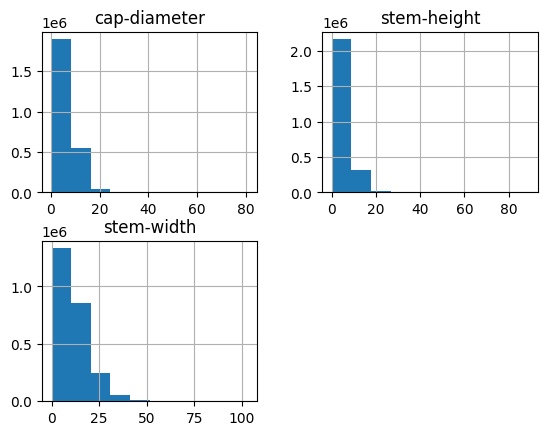

In [217]:
x_train[["cap-diameter", "stem-height", "stem-width"]].hist()

In [218]:
x_train[["cap-diameter", "stem-height", "stem-width"]] = np.log(x_train[["cap-diameter", "stem-height", "stem-width"]] + 1)

In [219]:
from sklearn.preprocessing import StandardScaler

array([[<Axes: title={'center': 'cap-diameter'}>,
        <Axes: title={'center': 'stem-height'}>],
       [<Axes: title={'center': 'stem-width'}>, <Axes: >]], dtype=object)

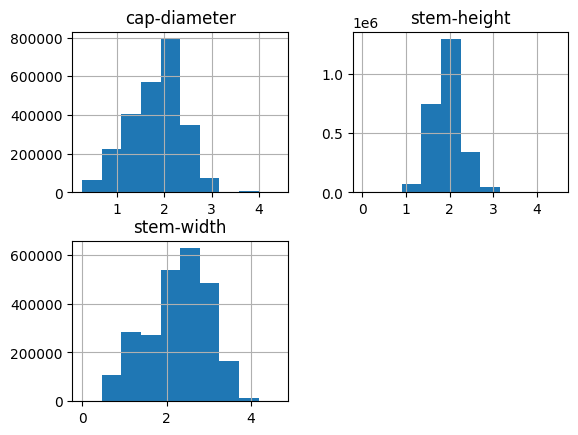

In [220]:
x_train[["cap-diameter", "stem-height", "stem-width"]].hist()

In [221]:
x_train_sc = x_train[["cap-diameter", "stem-height", "stem-width"]]
scl = StandardScaler()
x_train_sc = pd.DataFrame(scl.fit_transform(x_train_sc), columns = x_train_sc.columns, index = x_train_sc.index)
x_train[["cap-diameter", "stem-height", "stem-width"]] = x_train_sc

array([[<Axes: title={'center': 'cap-diameter'}>,
        <Axes: title={'center': 'stem-height'}>],
       [<Axes: title={'center': 'stem-width'}>, <Axes: >]], dtype=object)

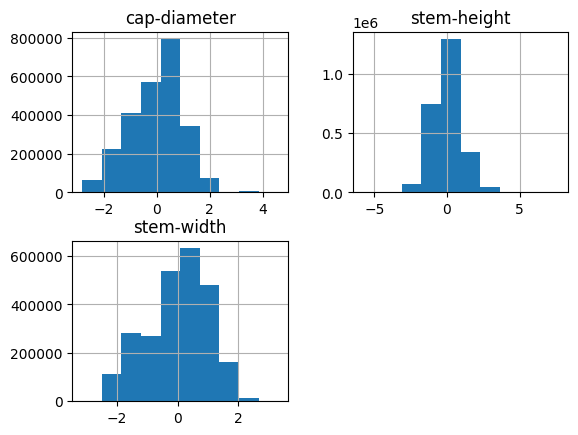

In [222]:
x_train[["cap-diameter", "stem-height", "stem-width"]].hist()

In [223]:
x_test

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
430964,430964,4.29,b,h,n,f,NaN,NaN,k,9.95,...,NaN,NaN,w,NaN,NaN,t,NaN,k,g,w
1907082,1907082,4.12,f,NaN,n,f,x,c,g,5.70,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
2626732,2626732,6.18,f,i,n,f,e,c,n,4.02,...,NaN,NaN,w,NaN,NaN,t,r,NaN,w,u
38950,38950,4.43,s,NaN,n,t,d,c,b,6.03,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,u
96583,96583,12.14,x,k,n,t,p,NaN,o,7.60,...,c,NaN,y,NaN,NaN,f,f,NaN,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719215,2719215,2.89,b,t,p,f,a,c,r,5.27,...,NaN,t,y,NaN,NaN,f,f,NaN,g,a
2120209,2120209,5.80,x,i,y,f,a,c,k,8.28,...,NaN,i,n,NaN,k,t,z,k,g,a
2541500,2541500,2.40,x,NaN,b,f,NaN,d,w,6.35,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
638487,638487,7.18,s,d,e,t,d,c,w,7.22,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,u


In [224]:
x_test = x_test.drop("id", axis = 1)
x_test["cap-diameter"] = x_test["cap-diameter"].fillna(cd_med).astype("float16")

In [225]:
for i in cap_shape_vals:
    x_test[f"cap-shape_{i}"] =  (x_test["cap-shape"] == i).astype("int8")
x_test = x_test.drop("cap-shape", axis = 1)

In [226]:
x_test["cap-surface"] = x_test["cap-surface"].apply(lambda x: np.random.choice(cup_surf_d.keys(), p = cup_surf_d.values) if isinstance(x, float) else x )
for i in cup_surf_d.keys():
    x_test[f"cap-surface_{i}"] =  (x_test["cap-surface"] == i).astype("int8")
x_test = x_test.drop("cap-surface", axis = 1)

In [227]:
x_test["cap-color"] = x_test["cap-color"].apply(lambda x: np.random.choice(cap_color_d.keys(), p = cap_color_d.values) if isinstance(x, float) else x )
for i in cap_color_d.keys():
    x_test[f"cap-color_{i}"] =  (x_test["cap-color"] == i).astype("int8")
x_test = x_test.drop("cap-color", axis = 1)

In [228]:
x_test["does-bruise-or-bleed"] = x_test["does-bruise-or-bleed"].apply(lambda x: np.random.choice(bruise_bleed_d.keys(), p = bruise_bleed_d.values) if isinstance(x, float) else x )
for i in bruise_bleed_d.keys():
    x_test[f"does-bruise-or-bleed_{i}"] =  (x_test["does-bruise-or-bleed"] == i).astype("int8")
x_test = x_test.drop("does-bruise-or-bleed", axis = 1)

In [229]:
x_test["gill-attachment"] = x_test["gill-attachment"].apply(lambda x: np.random.choice(gill_att_d.keys(), p = gill_att_d.values) if isinstance(x, float) else x )
for i in gill_att_d.keys():
    x_test[f"gill-attachment_{i}"] =  (x_test["gill-attachment"] == i).astype("int8")
x_test = x_test.drop("gill-attachment", axis = 1)

In [230]:
x_test["gill-spacing"] = x_test["gill-spacing"].apply(lambda x: np.random.choice(gill_space_d.keys(), p = gill_space_d.values) if isinstance(x, float) else x )
for i in gill_space_d.keys():
    x_test[f"gill-spacing_{i}"] =  (x_test["gill-spacing"] == i).astype("int8")
x_test = x_test.drop("gill-spacing", axis = 1)

In [231]:
x_test["gill-color"] = x_test["gill-color"].apply(lambda x: np.random.choice(gill_color_d.keys(), p = gill_color_d.values) if isinstance(x, float) else x )
for i in gill_color_d.keys():
    x_test[f"gill-color_{i}"] =  (x_test["gill-color"] == i).astype("int8")
x_test = x_test.drop("gill-color", axis = 1)

In [232]:
x_test["stem-height"] = x_test["stem-height"].fillna(sh_med).astype("float16")
x_test["stem-width"] = x_test["stem-width"].fillna(sw_med).astype("float16")

In [233]:
x_test = x_test.drop("stem-root", axis = 1)
x_test = x_test.drop("stem-surface", axis = 1)

In [234]:
x_test["stem-color"] = x_test["stem-color"].apply(lambda x: np.random.choice(stem_color_d.keys(), p = stem_color_d.values) if isinstance(x, float) else x )
for i in stem_color_d.keys():
    x_test[f"stem-color_{i}"] =  (x_test["stem-color"] == i).astype("int8")
x_test = x_test.drop("stem-color", axis = 1)

In [235]:
x_test = x_test.drop("veil-type", axis = 1)
x_test = x_test.drop("veil-color", axis = 1)

In [236]:
x_test["has-ring"] = x_test["has-ring"].apply(lambda x: np.random.choice(has_ring_d.keys(), p = has_ring_d.values) if isinstance(x, float) else x )
for i in has_ring_d.keys():
    x_test[f"has-ring_{i}"] =  (x_test["has-ring"] == i).astype("int8")
x_test = x_test.drop("has-ring", axis = 1)

In [237]:
x_test["ring-type"] = x_test["ring-type"].apply(lambda x: np.random.choice(ring_type_d.keys(), p = ring_type_d.values) if isinstance(x, float) else x )
for i in ring_type_d.keys():
    x_test[f"ring-type_{i}"] =  (x_test["ring-type"] == i).astype("int8")
x_test = x_test.drop("ring-type", axis = 1)

In [238]:
x_test = x_test.drop("spore-print-color", axis = 1)

In [239]:
x_test["habitat"] = x_test["habitat"].apply(lambda x: np.random.choice(habitat_d.keys(), p = habitat_d.values) if isinstance(x, float) else x )
for i in habitat_d.keys():
    x_test[f"habitat_{i}"] =  (x_test["habitat"] == i).astype("int8")
x_test = x_test.drop("habitat", axis = 1)

In [240]:
x_test["season"] = x_test["season"].apply(lambda x: np.random.choice(season_d.keys(), p = season_d.values) if isinstance(x, float) else x )
for i in season_d.keys():
    x_test[f"season_{i}"] =  (x_test["season"] == i).astype("int8")
x_test = x_test.drop("season", axis = 1)

In [241]:
x_test[["cap-diameter", "stem-height", "stem-width"]] = np.log(x_test[["cap-diameter", "stem-height", "stem-width"]] + 1)

In [242]:
x_test_sc = x_test[["cap-diameter", "stem-height", "stem-width"]]
x_test_sc = pd.DataFrame(scl.transform(x_test_sc), columns = x_test_sc.columns, index = x_test_sc.index)
x_test[["cap-diameter", "stem-height", "stem-width"]] = x_test_sc

array([[<Axes: title={'center': 'cap-diameter'}>,
        <Axes: title={'center': 'stem-height'}>],
       [<Axes: title={'center': 'stem-width'}>, <Axes: >]], dtype=object)

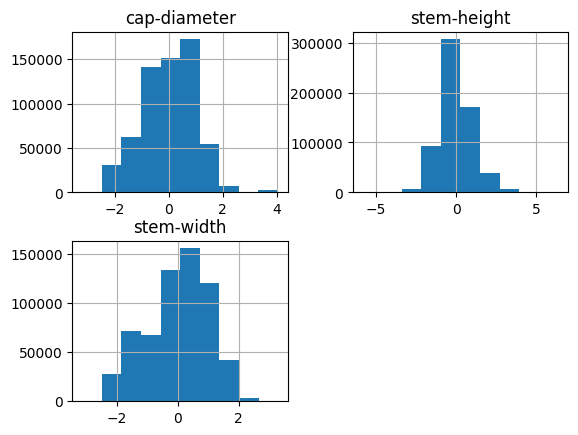

In [243]:
x_test[["cap-diameter", "stem-height", "stem-width"]].hist()

In [244]:
x_test

C:\Users\asrya\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
C:\Users\asrya\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,cap-diameter,stem-height,stem-width,cap-shape_x,cap-shape_f,cap-shape_s,cap-shape_b,cap-shape_o,cap-shape_p,cap-shape_c,...,ring-type_p,ring-type_g,habitat_d,habitat_g,habitat_l,habitat_m,season_a,season_u,season_w,season_s
430964,-0.301025,1.374023,-0.425537,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1907082,-0.358643,-0.104736,-0.917969,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2626732,0.245117,-0.973633,0.502441,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
38950,-0.255615,0.039124,-0.371094,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
96583,1.325195,0.646973,1.603516,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719215,-0.850586,-0.304443,-0.425537,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2120209,0.147583,0.875488,-0.052795,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2541500,-1.091797,0.174072,-0.760254,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
638487,0.477295,0.505859,0.137695,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [245]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [246]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)
accuracy_score(y_train, model1.predict(x_train)), accuracy_score(y_test, model1.predict(x_test))

C:\Users\asrya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.7696177667555892, 0.7692949346234855)

In [247]:
model2 = GaussianNB()
model2.fit(x_train, y_train)
accuracy_score(y_train, model2.predict(x_train)), accuracy_score(y_test, model2.predict(x_test))

C:\Users\asrya\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:171: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
C:\Users\asrya\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:205: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
C:\Users\asrya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\naive_bayes.py:434: RuntimeWarning: invalid value encountered in scalar multiply
  self.epsilon_ = self.var_smoothing * np.var(X, axis=0).max()


(0.4529406999481864, 0.4525520982885486)

In [ ]:
model_rf = RandomForestClassifier(n_estimators=300, max_depth=5, min_samples_split=7, min_samples_leaf=5, random_state=0)
model_rf.fit(x_train, y_train)
accuracy_score(y_train, model_rf.predict(x_train)), accuracy_score(y_test, model_rf.predict(x_test))

In [ ]:
model_adab = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=10, learning_rate=1, random_state=0)
model_adab.fit(x_train, y_train)
accuracy_score(y_train, model_adab.predict(x_train)), accuracy_score(y_test, model_adab.predict(x_test))

In [ ]:
test = pd.read_csv("test_mushrooms.csv")

In [ ]:
test = test.drop("id", axis = 1)
test["cap-diameter"] = test["cap-diameter"].fillna(cd_med).astype("float16")

In [ ]:
for i in cap_shape_vals:
    test[f"cap-shape_{i}"] =  (test["cap-shape"] == i).astype("int8")
test = test.drop("cap-shape", axis = 1)

In [ ]:
test["cap-surface"] = test["cap-surface"].apply(lambda x: np.random.choice(cup_surf_d.keys(), p = cup_surf_d.values) if isinstance(x, float) else x )
for i in cup_surf_d.keys():
    test[f"cap-surface_{i}"] =  (test["cap-surface"] == i).astype("int8")
test = test.drop("cap-surface", axis = 1)

In [ ]:
test["cap-color"] = test["cap-color"].apply(lambda x: np.random.choice(cap_color_d.keys(), p = cap_color_d.values) if isinstance(x, float) else x )
for i in cap_color_d.keys():
    test[f"cap-color_{i}"] =  (test["cap-color"] == i).astype("int8")
test = test.drop("cap-color", axis = 1)

In [ ]:
test["does-bruise-or-bleed"] = test["does-bruise-or-bleed"].apply(lambda x: np.random.choice(bruise_bleed_d.keys(), p = bruise_bleed_d.values) if isinstance(x, float) else x )
for i in bruise_bleed_d.keys():
    test[f"does-bruise-or-bleed_{i}"] =  (test["does-bruise-or-bleed"] == i).astype("int8")
test = test.drop("does-bruise-or-bleed", axis = 1)

In [ ]:
test["gill-attachment"] = test["gill-attachment"].apply(lambda x: np.random.choice(gill_att_d.keys(), p = gill_att_d.values) if isinstance(x, float) else x )
for i in gill_att_d.keys():
    test[f"gill-attachment_{i}"] =  (test["gill-attachment"] == i).astype("int8")
test = test.drop("gill-attachment", axis = 1)

In [ ]:
test["gill-spacing"] = test["gill-spacing"].apply(lambda x: np.random.choice(gill_space_d.keys(), p = gill_space_d.values) if isinstance(x, float) else x )
for i in gill_space_d.keys():
    test[f"gill-spacing_{i}"] =  (test["gill-spacing"] == i).astype("int8")
test = test.drop("gill-spacing", axis = 1)

In [ ]:
test["gill-color"] = test["gill-color"].apply(lambda x: np.random.choice(gill_color_d.keys(), p = gill_color_d.values) if isinstance(x, float) else x )
for i in gill_color_d.keys():
    test[f"gill-color_{i}"] =  (test["gill-color"] == i).astype("int8")
test = test.drop("gill-color", axis = 1)

In [ ]:
test["stem-height"] = test["stem-height"].fillna(sh_med).astype("float16")
test["stem-width"] = test["stem-width"].fillna(sw_med).astype("float16")

In [ ]:
test = test.drop("stem-root", axis = 1)
test = test.drop("stem-surface", axis = 1)

In [ ]:
test["stem-color"] = test["stem-color"].apply(lambda x: np.random.choice(stem_color_d.keys(), p = stem_color_d.values) if isinstance(x, float) else x )
for i in stem_color_d.keys():
    test[f"stem-color_{i}"] =  (test["stem-color"] == i).astype("int8")
test = test.drop("stem-color", axis = 1)

In [ ]:
test = test.drop("veil-type", axis = 1)
test = test.drop("veil-color", axis = 1)

In [ ]:
test["has-ring"] = test["has-ring"].apply(lambda x: np.random.choice(has_ring_d.keys(), p = has_ring_d.values) if isinstance(x, float) else x )
for i in has_ring_d.keys():
    test[f"has-ring_{i}"] =  (test["has-ring"] == i).astype("int8")
test = test.drop("has-ring", axis = 1)

In [ ]:
test["ring-type"] = test["ring-type"].apply(lambda x: np.random.choice(ring_type_d.keys(), p = ring_type_d.values) if isinstance(x, float) else x )
for i in ring_type_d.keys():
    test[f"ring-type_{i}"] =  (test["ring-type"] == i).astype("int8")
test = test.drop("ring-type", axis = 1)

In [ ]:
test = test.drop("spore-print-color", axis = 1)

In [ ]:
test["habitat"] = test["habitat"].apply(lambda x: np.random.choice(habitat_d.keys(), p = habitat_d.values) if isinstance(x, float) else x )
for i in habitat_d.keys():
    test[f"habitat_{i}"] =  (test["habitat"] == i).astype("int8")
test = test.drop("habitat", axis = 1)

In [ ]:
test["season"] = test["season"].apply(lambda x: np.random.choice(season_d.keys(), p = season_d.values) if isinstance(x, float) else x )
for i in season_d.keys():
    test[f"season_{i}"] =  (test["season"] == i).astype("int8")
test = test.drop("season", axis = 1)

In [ ]:
test[["cap-diameter", "stem-height", "stem-width"]] = np.log(test[["cap-diameter", "stem-height", "stem-width"]] + 1)

In [ ]:
test_sc = test[["cap-diameter", "stem-height", "stem-width"]]
test_sc = pd.DataFrame(scl.transform(test_sc), columns = test_sc.columns, index = test_sc.index)
test[["cap-diameter", "stem-height", "stem-width"]] = test_sc

In [ ]:
test

In [ ]:
preds = model_rf.predict(test)

In [ ]:
ss = pd.read_csv("sample_submission.csv")
ss

In [ ]:
ss["class"] = preds
ss

In [ ]:
ss.to_csv("sample_submission_1.csv", index=False)